In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset from my computer

df = pd.read_csv(r'E:\Information Technology (IT) Courceses\Redi School Hamburg\Data Circle\Flu Shot Learning Predict H1N1 and Seasonal Flu Vaccines\Data\training_set_features.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [16]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [11]:
# 1. Check basic dataset information
print("=== Dataset Dimensions ===")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}\n")

=== Dataset Dimensions ===
Number of rows: 26707
Number of columns: 36



In [12]:
print("=== Column Data Types ===")
print(df.dtypes)

=== Column Data Types ===
respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object

In [13]:
# 2. Check for missing values
print("\n=== Missing Values Summary ===")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_info = pd.concat([missing_values, missing_percentage], axis=1)
missing_info.columns = ['Missing Values', 'Percentage']
print(missing_info[missing_info['Missing Values'] > 0].sort_values('Percentage', ascending=False))


=== Missing Values Summary ===
                             Missing Values  Percentage
employment_occupation                 13470   50.436215
employment_industry                   13330   49.912008
health_insurance                      12274   45.957989
income_poverty                         4423   16.561201
doctor_recc_h1n1                       2160    8.087767
doctor_recc_seasonal                   2160    8.087767
rent_or_own                            2042    7.645936
employment_status                      1463    5.477965
marital_status                         1408    5.272026
education                              1407    5.268282
chronic_med_condition                   971    3.635751
child_under_6_months                    820    3.070356
health_worker                           804    3.010447
opinion_seas_sick_from_vacc             537    2.010709
opinion_seas_risk                       514    1.924589
opinion_seas_vacc_effective             462    1.729884
opinion_h1n1_sic

In [ ]:
# 3. Display describtive statistics
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


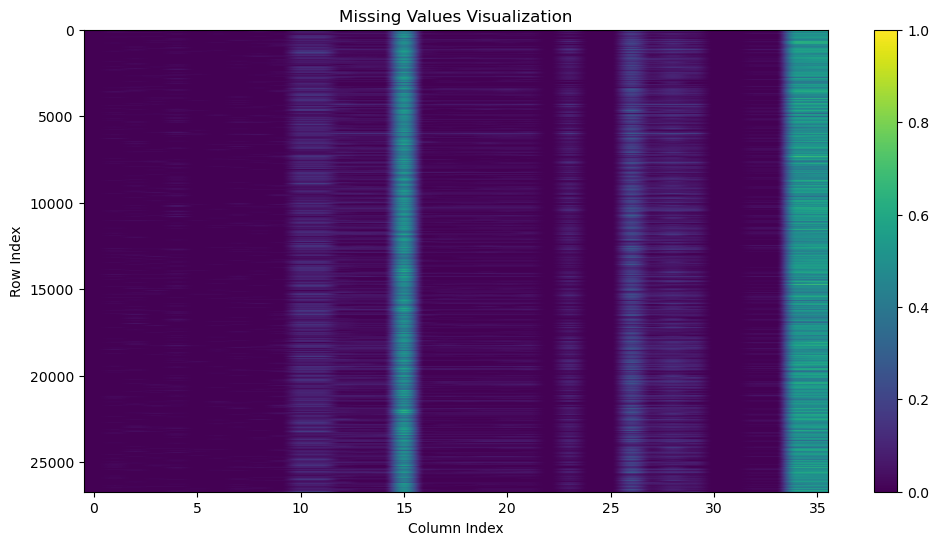

In [19]:
# 4. Create a simple visualization of missing values (without seaborn)
plt.figure(figsize=(12, 6))
plt.imshow(df.isnull(), aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Missing Values Visualization')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()


In [20]:
# 5. Profile summary function
def dataset_profile(df):
    profile = pd.DataFrame({
        'Column': df.columns,
        'Data Type': df.dtypes,
        'Unique Values': df.nunique(),
        'Missing Values': df.isnull().sum(),
        'Missing %': (df.isnull().sum() / len(df)) * 100
    })
    return profile.sort_values('Missing %', ascending=False)

print("\n=== Complete Dataset Profile ===")
print(dataset_profile(df))


=== Complete Dataset Profile ===
                                                  Column Data Type  \
employment_occupation              employment_occupation    object   
employment_industry                  employment_industry    object   
health_insurance                        health_insurance   float64   
income_poverty                            income_poverty    object   
doctor_recc_h1n1                        doctor_recc_h1n1   float64   
doctor_recc_seasonal                doctor_recc_seasonal   float64   
rent_or_own                                  rent_or_own    object   
employment_status                      employment_status    object   
marital_status                            marital_status    object   
education                                      education    object   
chronic_med_condition              chronic_med_condition   float64   
child_under_6_months                child_under_6_months   float64   
health_worker                              health_worker

In [23]:
# 1. Generate summary statistics for all features
def generate_summary(df):
    # Numerical features summary
    num_summary = df.select_dtypes(include=np.number).describe(percentiles=[.25, .5, .75]).T
    num_summary['missing'] = df.select_dtypes(include=np.number).isnull().sum()
    num_summary['missing_pct'] = (num_summary['missing']/len(df))*100
    num_summary['dtype'] = 'numerical'
    
    # Categorical features summary
    cat_summary = pd.DataFrame()
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        temp = pd.DataFrame({
            'unique': df[col].nunique(),
            'top': df[col].mode()[0],
            'freq': df[col].value_counts().iloc[0],
            'missing': df[col].isnull().sum(),
            'missing_pct': (df[col].isnull().sum()/len(df))*100
        }, index=[col])
        cat_summary = pd.concat([cat_summary, temp])
    
    cat_summary['dtype'] = 'categorical'
    
    # Combine summaries
    full_summary = pd.concat([num_summary, cat_summary], axis=0)
    return full_summary.sort_values('missing_pct', ascending=False)

feature_summary = generate_summary(df)
print(generate_summary(df))

                               count          mean          std  min     25%  \
employment_occupation            NaN           NaN          NaN  NaN     NaN   
employment_industry              NaN           NaN          NaN  NaN     NaN   
health_insurance             14433.0      0.879720     0.325300  0.0     1.0   
income_poverty                   NaN           NaN          NaN  NaN     NaN   
doctor_recc_h1n1             24547.0      0.220312     0.414466  0.0     0.0   
doctor_recc_seasonal         24547.0      0.329735     0.470126  0.0     0.0   
rent_or_own                      NaN           NaN          NaN  NaN     NaN   
employment_status                NaN           NaN          NaN  NaN     NaN   
marital_status                   NaN           NaN          NaN  NaN     NaN   
education                        NaN           NaN          NaN  NaN     NaN   
chronic_med_condition        25736.0      0.283261     0.450591  0.0     0.0   
child_under_6_months         25887.0    

# Initial Observations and Questions for Flu Shot Analysis

## Key Observations

1. **Dataset Overview**
   - The dataset contains vaccination records with 36 columns and 26,707 entries.
   - Columns include demographic information (age_group, education, race, sex, income_poverty), behavioral factors (h1n1_concern, behavioral_avoidance), medical history (chronic_med_condition, health_worker), and opinions on vaccine effectiveness/risk.
   - Target variables: `h1n1_vaccine` and `seasonal_vaccine`.

2. **Missing Values**
   - Significant missing values in columns like `employment_occupation` (50.4%), `employment_industry` (49.9%), and `health_insurance` (46.0%).
   - Other columns with notable missing data: `income_poverty` (16.6%), `doctor_recc_h1n1` (8.1%), and `doctor_recc_seasonal` (8.1%).

3. **Data Types**
   - Mix of numerical (float64, int64) and categorical (object) variables.
   - Binary variables (e.g., `behavioral_antiviral_meds`) are encoded as floats.

4. **Descriptive Statistics**
   - Behavioral variables (e.g., `behavioral_wash_hands`) show high mean values, indicating common practices.
   - Opinions on vaccine effectiveness (`opinion_h1n1_vacc_effective`) range from 1 to 5, with a mean of ~3.85.

5. **Exploratory Data Analysis (EDA) Setup**
   - The notebook loads libraries (pandas, numpy, matplotlib, seaborn) and the dataset from a local path.
   - Initial checks include `df.info()`, `df.head()`, and `df.describe()`.

---

## Potential Challenges

1. **Handling Missing Data**
   - How to address columns with >40% missing values (e.g., employment-related fields)?  
   - Should missing values be imputed, dropped, or retained with flags?

2. **Categorical Variables**
   - How to encode categorical variables (e.g., `education`, `race`) for modeling?
   - Are there high-cardinality categories (e.g., `employment_industry`) that need binning?

3. **Class Imbalance**
   - Are the target variables (`h1n1_vaccine`, `seasonal_vaccine`) balanced?  
   - If imbalanced, techniques like SMOTE or class weights may be needed.

4. **Feature Engineering**
   - Can new features be derived (e.g., combining `household_adults` and `household_children` into a "household_size" variable)?
   - Should opinion scores be aggregated or scaled?

5. **Model Selection**
   - Which models (logistic regression, random forest, XGBoost) are suitable for predicting vaccination uptake?
   - How to handle multicollinearity among behavioral variables?

---

## Questions for Further Investigation

1. **Target Variables**
   - What is the distribution of `h1n1_vaccine` and `seasonal_vaccine`?  
   - Is there a correlation between the two vaccines?

2. **Demographic Trends**
   - Which age groups or income levels are most/least likely to get vaccinated?  
   - Does `health_worker` status significantly predict vaccination?

3. **Behavioral Impact**
   - Do behaviors like `behavioral_wash_hands` or `behavioral_avoidance` correlate with vaccination?  
   - Are there interaction effects between behaviors and opinions?

4. **Geospatial Patterns**
   - Does `hhs_geo_region` show regional trends in vaccination rates?  
   - How does `census_msa` (urban/rural classification) relate to outcomes?

5. **Model Interpretability**
   - Which features are most predictive of vaccination?  
   - Can SHAP values or feature importance provide actionable insights?

---

## Next Steps
- Perform deeper EDA (visualizations, correlation analysis).
- Preprocess data (handle missing values, encode categories).
- Train baseline models and evaluate performance metrics (AUC-ROC, precision-recall).